In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates
from datetime import datetime
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split , GridSearchCV 
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures 
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from xgboost import XGBRegressor
from category_encoders import BinaryEncoder
import pickle


In [2]:
df = pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
#checking missing value
df.isnull() .sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
#splitting date column into day, month and year
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] =  pd.DatetimeIndex(df['Date']).year
df


C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_40560\2226125849.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Day"]= pd.DatetimeIndex(df['Date']).day
C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_40560\2226125849.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Month'] = pd.DatetimeIndex(df['Date']).month
C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_40560\2226125849.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Year'] =  pd.DatetimeIndex(df['Date']).year


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.650350,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.753908,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000


#Feature Engineering 

In [7]:
def get_season(month):
    '''this function is to get season according to month column'''
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

Now let's create new features Month, Year and Season from Date column

In [8]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Season'] = df['Month'].apply(get_season)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Season
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2,2010,Winter
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2,2010,Winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Winter
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,3,2010,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,Autumn
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,10,2012,Autumn
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,10,2012,Autumn
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,Autumn


In [9]:
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Season
4892,35,2010-09-03,948660.79,0,78.52,2.715,136.589112,8.861,9,9,2010,Autumn
26,1,2010-08-06,1605491.78,0,87.16,2.627,211.504662,7.787,8,8,2010,Summer
5530,39,2011-12-09,1781528.77,0,49.36,3.158,217.664588,7.716,12,12,2011,Winter
5908,42,2010-12-17,537455.65,0,59.15,3.125,126.879484,9.003,17,12,2010,Winter
4038,29,2010-10-01,474698.01,0,69.31,2.717,132.756800,10.524,10,10,2010,Autumn


#Exploratory Data Analysis


#1. Univariate Analysis

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_40560\3753774772.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


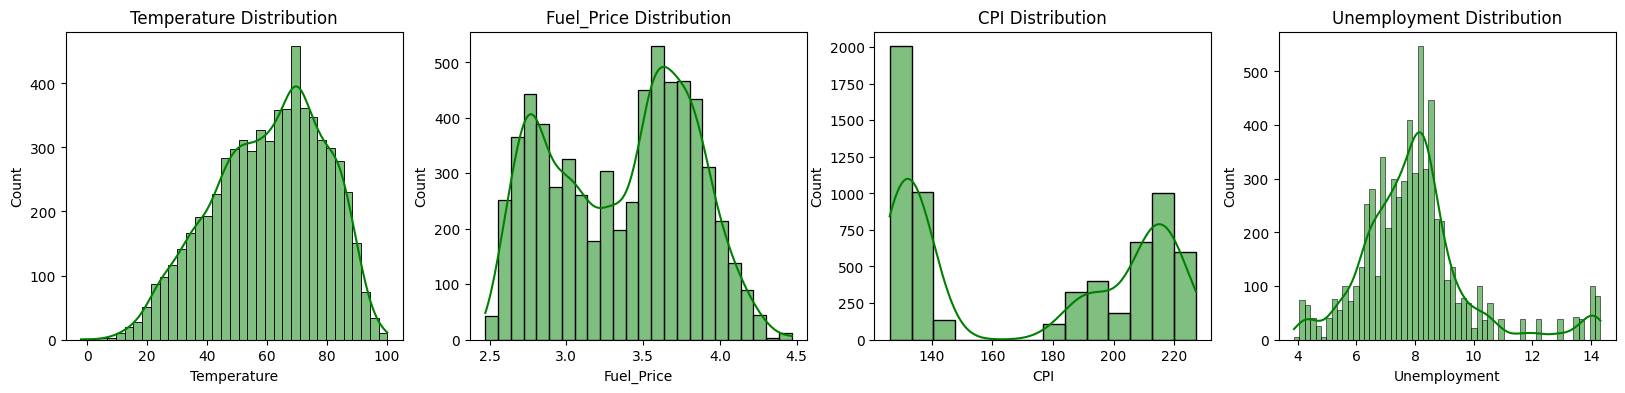

In [10]:
fig , ax = plt.subplots(1,4,figsize=(20,4))
cols = ['Temperature','Fuel_Price','CPI','Unemployment']
for i,col in enumerate(cols):
    sns.histplot(df,
                 x=col,
                 ax=ax[i],
                 kde=True,
                 color = 'green'
                )
    ax[i].set_title(f'{col} Distribution')
fig.show() 

CPI and Fuel_Price have bimodal distribution.
Temperature and Unemployment have normal distribution.

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_40560\1575044674.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


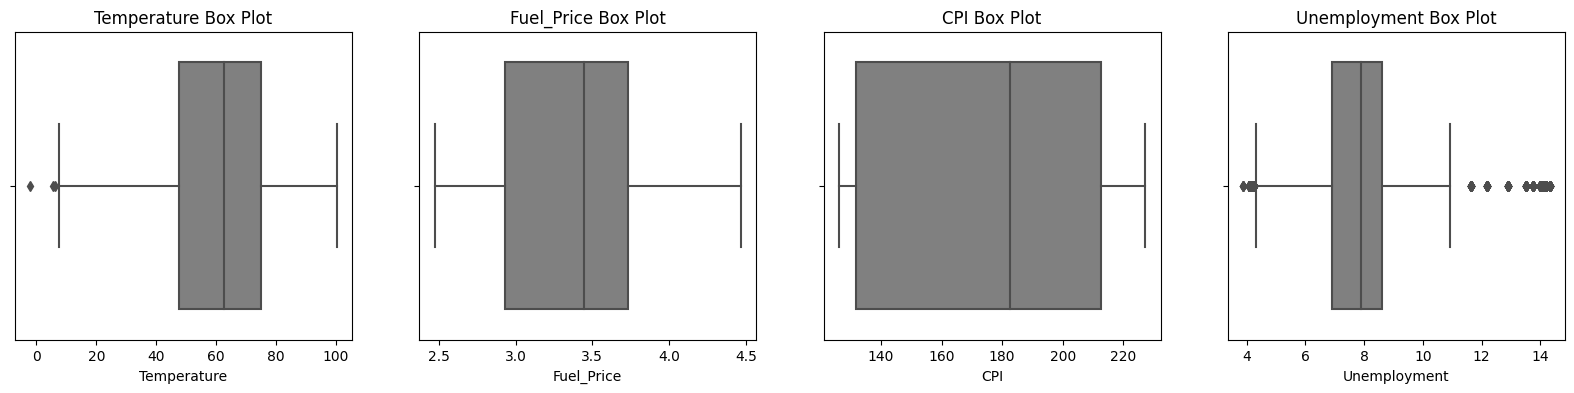

In [11]:
fig , ax = plt.subplots(1,4,figsize=(20,4))
cols = ['Temperature','Fuel_Price','CPI','Unemployment']
for i,col in enumerate(cols):
    sns.boxplot(df,
                 x=col,
                 ax=ax[i],
                 color = 'grey'
                )
    ax[i].set_title(f'{col} Box Plot')
fig.show()

Unemployment column has outliers that need to be handled.

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_40560\1076639607.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


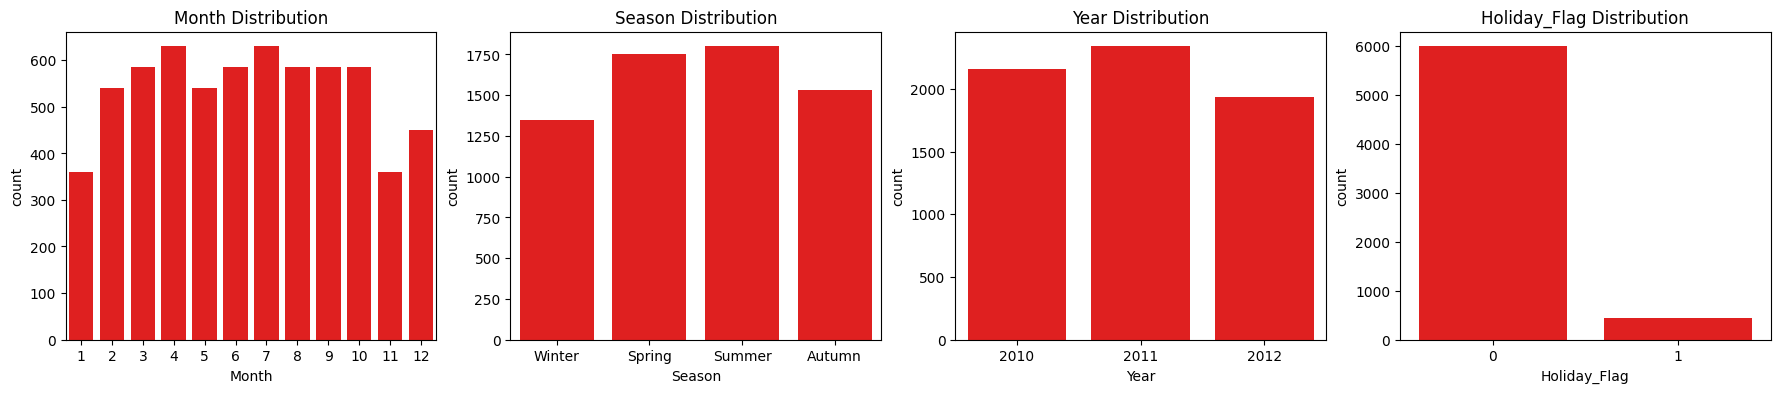

In [12]:
fig , ax = plt.subplots(1,4,figsize=(22,4))
cols = ['Month','Season','Year','Holiday_Flag']
for i,col in enumerate(cols):
    sns.countplot(df,
                 x=col,
                 ax=ax[i],
                 color = 'Red'
                )
    ax[i].set_title(f'{col} Distribution')
fig.show()

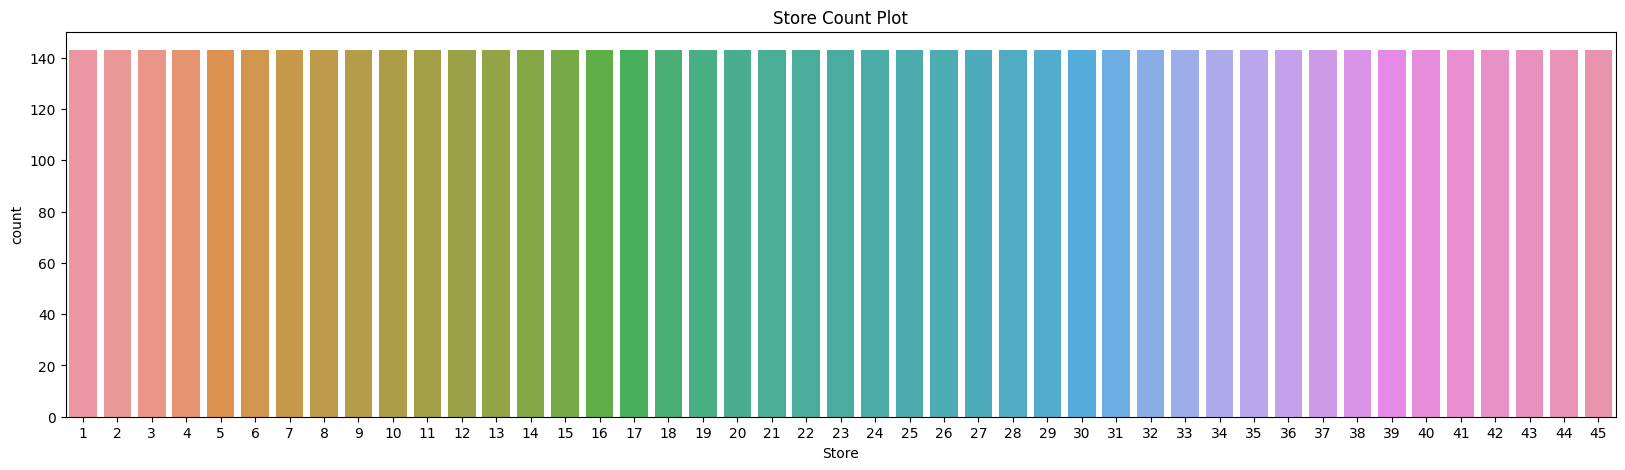

In [13]:
plt.figure(figsize=(20,5))
sns.countplot(df,x='Store');
plt.title('Store Count Plot');

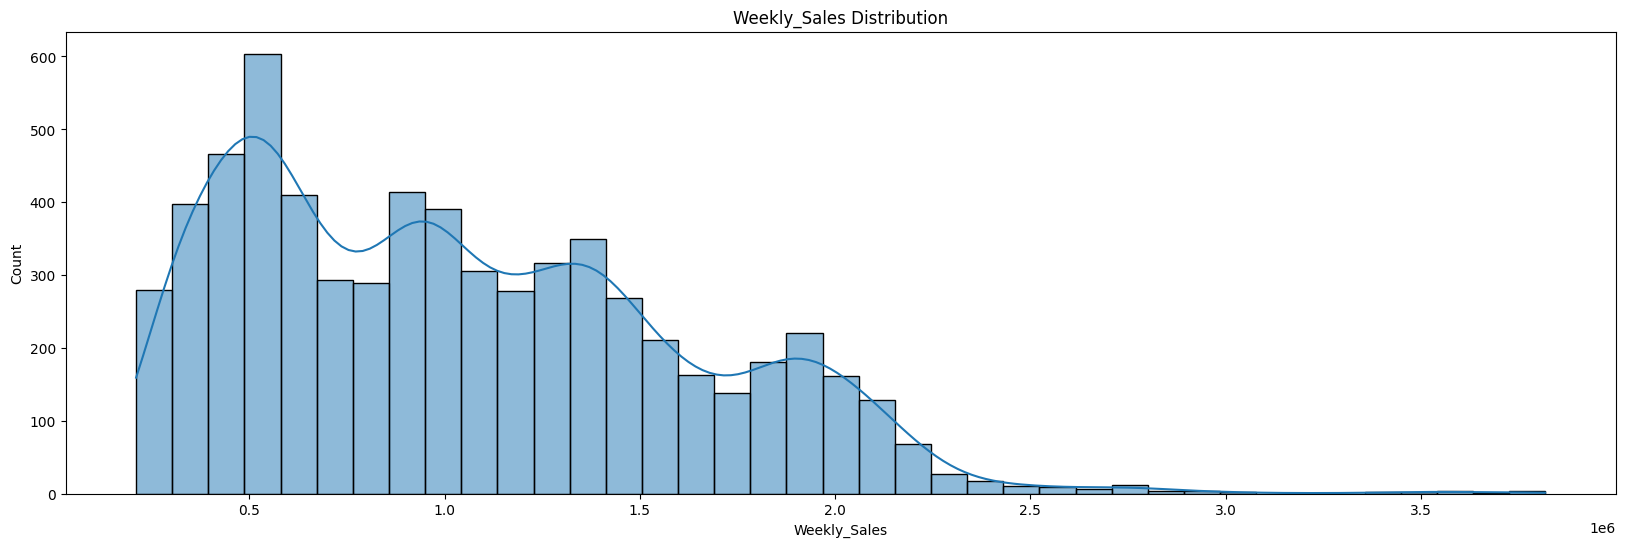

In [14]:
plt.figure(figsize=(20,6))
sns.histplot(x=df['Weekly_Sales'],kde=True);
plt.title('Weekly_Sales Distribution');

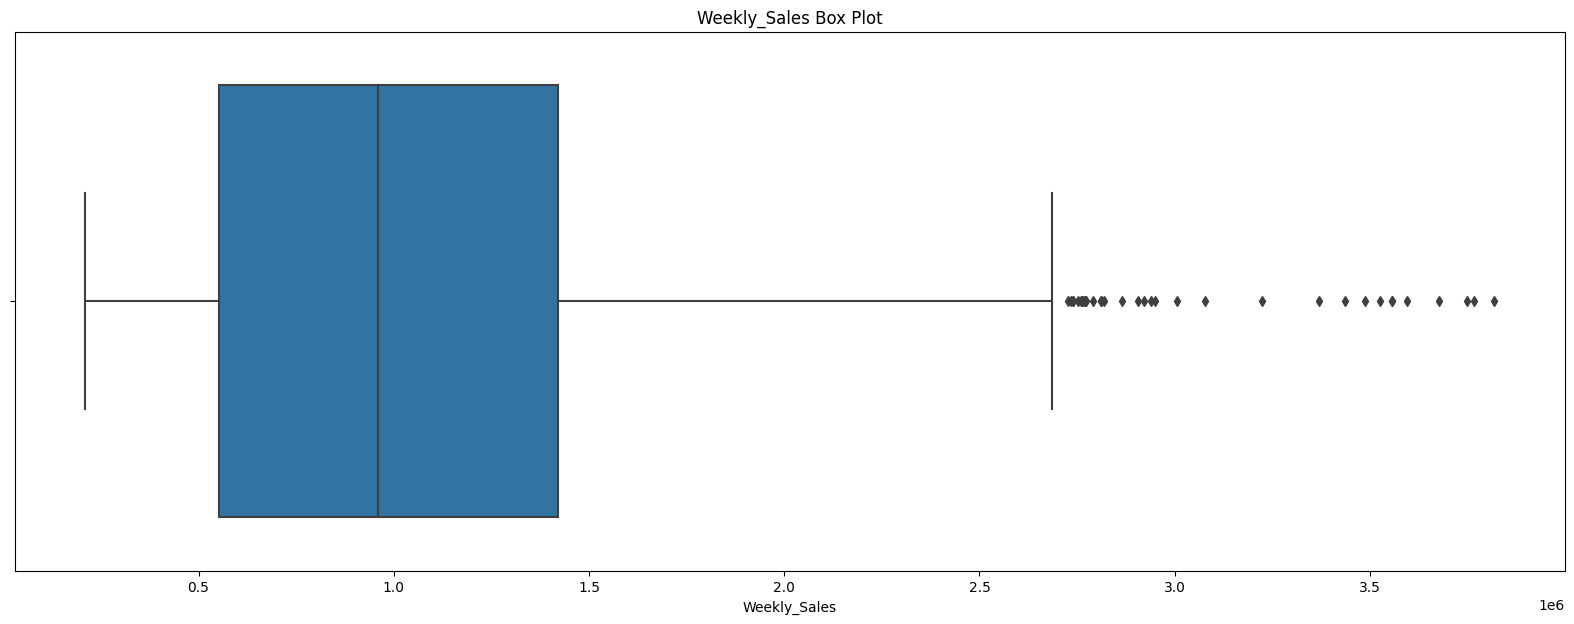

In [15]:
plt.figure(figsize=(20,7))
sns.boxplot(x=df['Weekly_Sales']);
plt.title('Weekly_Sales Box Plot');

#Weekly_Sales distribution is right skewed as it has some outliers.

2. Bivariate Analysis

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_40560\2078892063.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


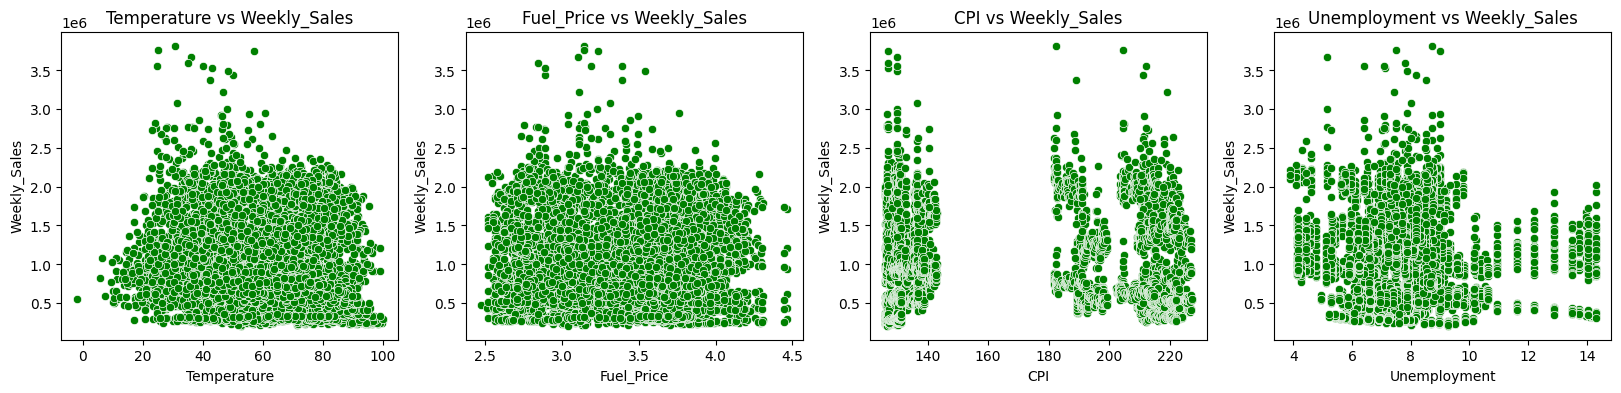

In [19]:
fig , ax = plt.subplots(1,4,figsize=(20,4))
cols = ['Temperature','Fuel_Price','CPI','Unemployment']
for i,col in enumerate(cols):
    sns.scatterplot(df,
                 y='Weekly_Sales',x=col,
                 ax=ax[i],
                 color = 'green'
                )
    ax[i].set_title(f'{col} vs Weekly_Sales')
fig.show()  

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_40560\620639510.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


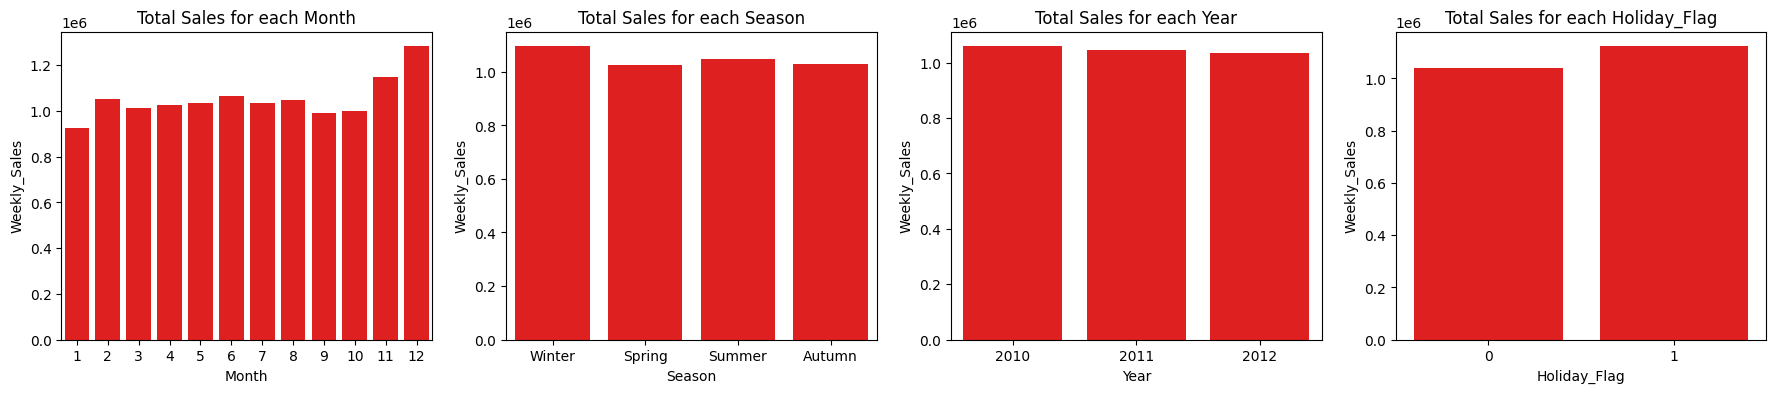

In [20]:
fig , ax = plt.subplots(1,4,figsize=(22,4))
cols = ['Month','Season','Year','Holiday_Flag']
for i,col in enumerate(cols):
    sns.barplot(df,
                 x=col,y='Weekly_Sales',
                 ax=ax[i],
                 errorbar=None,
                 color='Red'
                )
    ax[i].set_title(f'Total Sales for each {col}')
fig.show() 

Sales tend to be higher in winter and holidays.
Sales are higher in Months 11 ,12.

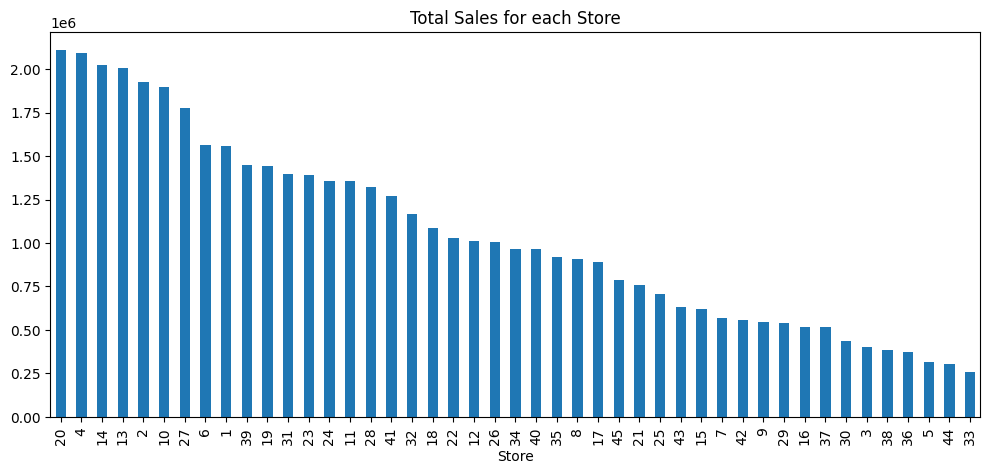

In [21]:
plt.figure(figsize=(12,5))
df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).plot(kind='bar');
plt.title('Total Sales for each Store');

Stores 20 ,4 ,14 ,13 ,2 achieved the highest sales with sales over 2M while stores like 33,44,5 achieve the lowest sales with sales around 0.25M

#### This is the most important step to achieve the highest accuracy as we can't treat Store as numerical feature so we should transform it to categorical one first before modeling.

In [22]:
df['Store'] = df['Store'].astype('object')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Season
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2,2010,Winter
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2,2010,Winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Winter
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,3,2010,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,Autumn
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,10,2012,Autumn
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,10,2012,Autumn
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,Autumn


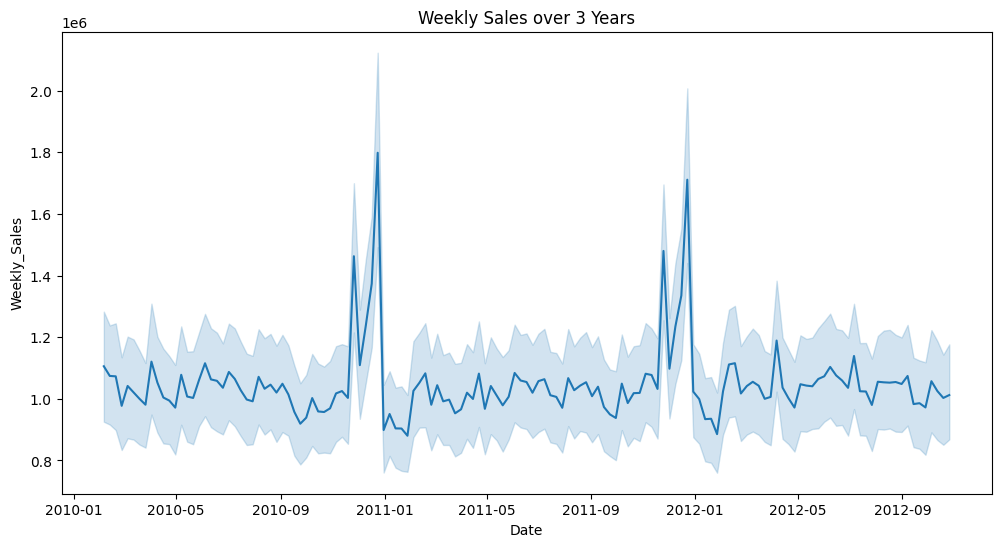

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df["Date"],y=df['Weekly_Sales']);
plt.title('Weekly Sales over 3 Years');

as we mentioned before ,Sales are higher in Months 11 ,12.

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_40560\2641001450.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["Month"],y=df['Weekly_Sales'],hue=df['Year'],ci=None);


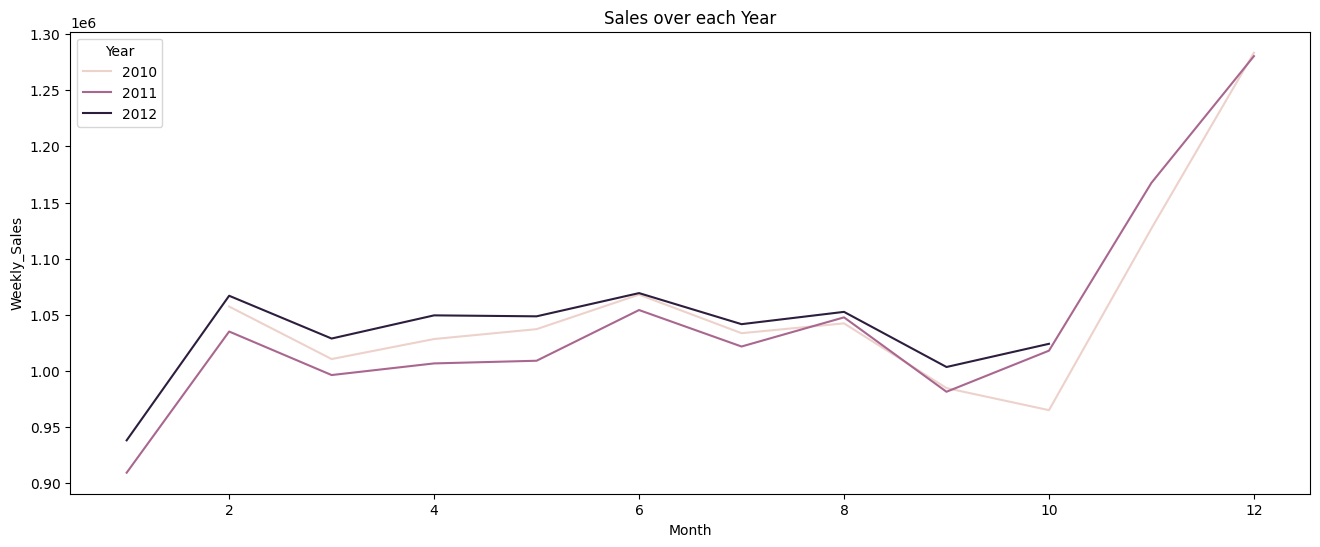

In [24]:
plt.figure(figsize=(16,6))
sns.lineplot(x=df["Month"],y=df['Weekly_Sales'],hue=df['Year'],ci=None);
plt.title('Sales over each Year');

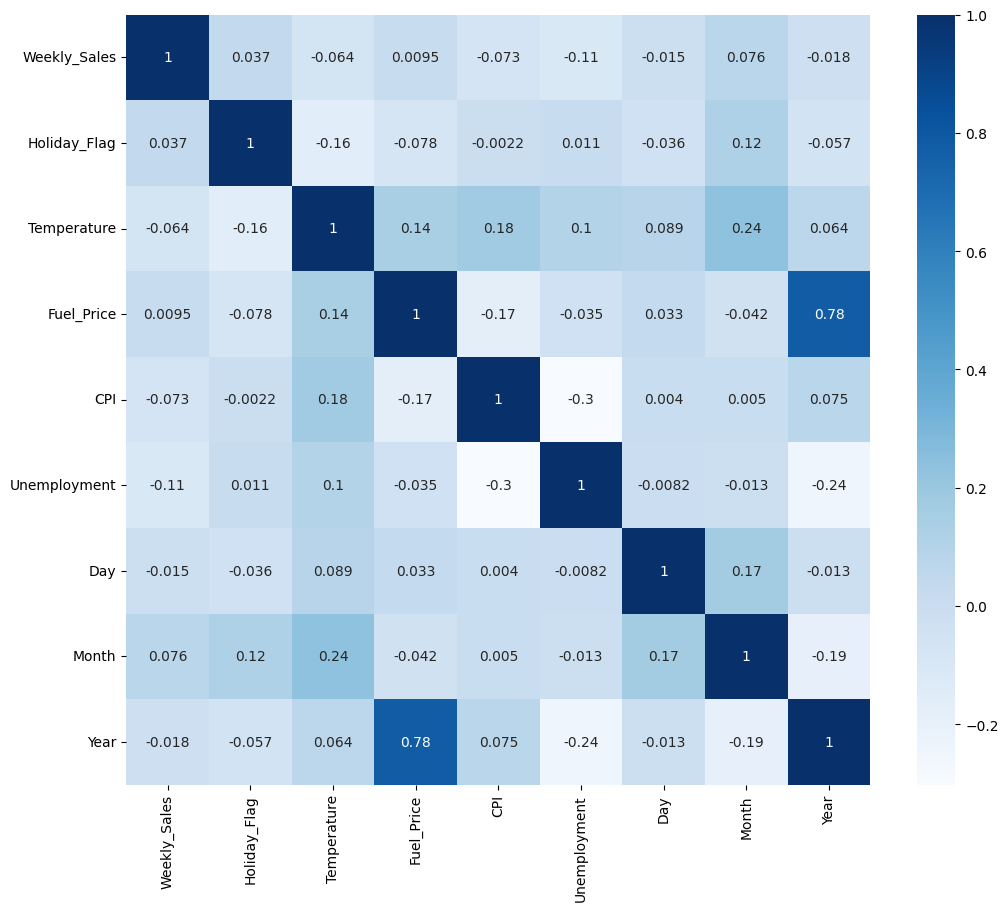

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True);

# Data preproccessing 


##Removing Outliers

In [26]:
num_features = ['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']
for feature in num_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df = df[(df[feature] >= lower) & (df[feature] <= upper)]
    

In [27]:
train_data = df[:int(0.7*(len(df)))] # taking train part
test_data = df[int(0.7*(len(df))):] # taking test part

target = "Weekly_Sales"
used_cols = [c for c in df.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [28]:
X_train = X_train.drop(['Date'], axis=1) # dropping date from train
X_test = X_test.drop(['Date'], axis=1) # dropping date from test

In [ ]:
def wmae_test(test, pred): # WMAE for test 
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [ ]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

# Model Building

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
def tune_and_evaluate(model,param_grid):
    
    '''This function recieves a model then tune it using GridSearch 
    then print the best parameters and return the best estimator'''
    
    # tunning the model
    grid_search = GridSearchCV(estimator= model,param_grid= param_grid,cv=5,scoring='r2')
    grid_search.fit(X_train,y_train)
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    best_score = grid_search.best_score_
    print("Best parameters are: ",best_params)
    print('Mean cross-validated score of the best_estimator is: ',best_score)
    print('-------------------------------------------------------------------')
    
    # best estimator evaluation
    print("Training set Accuracy:",round(best_estimator.score(X_train,y_train),3)*100)
    print("Test set Accuracy:",round(best_estimator.score(X_test,y_test),3)*100)
    
    return best_estimator

In [ ]:
features = df.columns.drop(['Weekly_Sales','Date','Year'])
target = 'Weekly_Sales'

X = df[features]
y = df[target]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

In [ ]:
def scatter(train_df_1,column):
  
  #plot the figure
  plt.figure()

  #plot the scatter plot with data from the specified column in x axis and weekly sales in y axis
  plt.scatter(train_df_1[column],train_df_1['Weekly_Sales'])

  #give y label as Weekly Sales
  plt.ylabel('Weekly_Sales')

  #give the x label as the column specified as parameter in the function
  plt.xlabel(column)

# linear reggression 

In [ ]:
# building the model
lin_reg = make_pipeline(
        PolynomialFeatures(degree=2),
        LinearRegression()
)

# hyperparameter tunning
param_grid = {'polynomialfeatures__degree':[2,3,4]}
lin_reg = tune_and_evaluate(lin_reg,param_grid)

In [ ]:
from category_encoders import BinaryEncoder

In [ ]:
from sklearn.linear_model import Ridge

# 2.ridge 

In [ ]:
# building the model
ridge = make_pipeline(
        PolynomialFeatures(degree=2),
        Ridge()
)

# hyperparameter tunning
param_grid = {
    'polynomialfeatures__degree':[2,3,4],
    'ridge__alpha':[1e-2,1e-3,1e-4]
}
ridge = tune_and_evaluate(ridge,param_grid)

# 3. decision tree

In [ ]:
# building the model
dec_tree = DecisionTreeRegressor()

# hyperparameter tunning
param_grid = {'max_depth': np.arange(2,13)}
dec_tree = tune_and_evaluate(dec_tree,param_grid)

In [ ]:
feat_imp = pd.Series(dec_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Feature Importance');

# Random Forest

In [ ]:
# building the model
random_forest = RandomForestRegressor(n_jobs=-1)

# hyperparameter tunning
param_grid = {
    'max_depth': np.arange(2,15),
    'n_estimators': np.arange(25,101,25)
}
random_forest = tune_and_evaluate(random_forest,param_grid)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

Sales tend to be higher in winter.
There is a high variance in sales from one store to another.
The best performing model is XGBoost with an accuracy of 96% on the training set and 97.2% on the test set.